In [69]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
df=pd.read_csv('/content/drive/MyDrive/0.MKCE/Datasets/HR_comma_sep.csv')

In [73]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc988bbad0>,
      dtype=object)

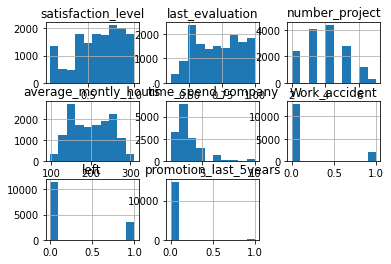

In [74]:
import matplotlib.pyplot as plt

df.hist()

In [97]:
x = df.select_dtypes(include=np.number)
y=df['left'].values
x.drop(['left'],axis=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [99]:
type(x)

numpy.ndarray

In [100]:
type(y)

numpy.ndarray

In [101]:
#splittingthe dataset into the traning set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [102]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(3000, 8)
(11999, 8)
(11999,)
(3000,)


In [103]:
#logistic regression 
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [104]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [105]:
#prediction

y_pred=model.predict(x_test)

y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [106]:
# probability of occurence 1 or 0 in place of corresponding x_test values
model.predict_proba(x_test)

array([[4.18834385e-03, 9.95811656e-01],
       [9.98485227e-01, 1.51477251e-03],
       [9.99081675e-01, 9.18325432e-04],
       ...,
       [3.83871205e-03, 9.96161288e-01],
       [9.98850904e-01, 1.14909553e-03],
       [9.97462868e-01, 2.53713203e-03]])

In [107]:
x_test

array([[0.44, 0.57, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.55, 0.96, 3.  , ..., 0.  , 0.  , 0.  ],
       [0.72, 0.67, 5.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.37, 0.54, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.52, 0.61, 4.  , ..., 0.  , 0.  , 0.  ],
       [0.13, 0.65, 4.  , ..., 0.  , 0.  , 0.  ]])

In [108]:
#to measure accuracy of model

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy_score(y_test,y_pred)

1.0

In [109]:
confusion_matrix(y_test,y_pred)

array([[2299,    0],
       [   0,  701]])

In [110]:
a=classification_report(y_test,y_pred)
print(a)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2299
           1       1.00      1.00      1.00       701

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [112]:
df_c= df.select_dtypes(include = object)

df_c.columns

Index(['Department', 'salary'], dtype='object')